In [3]:
import tweepy
from tweepy import OAuthHandler
import os
import re

In [5]:
consumer_key = "--------------------------------"
consumer_secret_key = "-------------------------------------"
access_token = "-----------------------------------------------------"
access_secret = "------------------------------------------"

auth = OAuthHandler(consumer_key, consumer_secret_key )
auth.set_access_token(access_token ,access_secret )
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
result = []
#for tweet in tweepy.Cursor(api.search, q = "", lang = "en", since = "2018-10-1" ).items(200):
tweet = api.user_timeline(screen_name= "@RahulGandhi", count = 200, lang = ['en'])  #maximum 200 are allowed 
    #print(tweet.created_at, tweet.text)
for t in tweet:
    result.append(t.text)
    
#api.GetUserTimeline(Screen_name= "")
result

['I am sorry to hear about the passing of Shivakumar Swami Ji, Pontiff of the Siddaganga Mutt. Swami Ji was respected… https://t.co/S3d2nUjRMQ',
 'Your Highness,\n\nThe cries for help are the cries of millions of unemployed youth; of farmers in distress; of oppres… https://t.co/iUnBfgQmOZ',
 "I'm upset to hear Arun Jaitley Ji is not well. We fight him on a daily basis for his ideas. However, I and the Cong… https://t.co/q5ibj6Q3d9",
 "I want to congratulate our PM, on winning the world famous “Kotler Presidential Award”! \n\nIn fact it's so famous it… https://t.co/R60U3iJFT0",
 'I wish you all a very Happy Pongal!\n\n #HappyPongal2019',
 'My condolences to the family of veteran Congress leader Shri Shivajirao Deshmukh Ji who passed away earlier today.… https://t.co/e3ynhaLFeA',
 'When the scales of justice are tampered with, anarchy reigns. \n\nThis PM will stop at nothing, stoop to anything &amp; d… https://t.co/4LiWQHgCCb',
 'I am humbled by the love of the Indian community here in t

In [19]:
result2 = []
for i in range(0, len(result)):
    txt = ' '.join(word for word in result[i].split() if not word.startswith("https:"))  #removes link
    result2.append(txt)
# result3 = ' '.join(word for word in result2)
# result3

In [29]:
def rmv_hindi(test):
    result4 = []
    for w in result2:
        p = re.compile(r'[a-zA-Z]+') #removes hindi words see its a;ternative in twitter analysis fol.
        q = p.findall(w)
        result4.append(" ".join(q))
        result4 = [y for y in result4 if y != '']   #removes all spaceelement 
    return result4

In [30]:
l = rmv_hindi(result2)

In [31]:
from textblob import TextBlob, Word
from textblob.sentiments import NaiveBayesAnalyzer

In [34]:
#sentiment analysis 
dataset = []
#reviewing
for i in range(len(l)):
    textB = TextBlob(l[i])
    sentiment = textB.sentiment.polarity
    #dataset.append(sentiment)
    if sentiment< 0.0:
        sentiment = "Negative"
        dataset.append(sentiment)

    elif sentiment > 0:
        sentiment = "Positive"
        dataset.append(sentiment)
    elif sentiment == 0:
        sentiment = "Neutral"
        dataset.append(sentiment)


In [50]:
#dataset

In [39]:
dataset.count('Positive')

44

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
p = dataset.count("Positive")
n = dataset.count("Negative")
n0 = dataset.count("Neutral")

In [42]:
label = "Positive Sen.", "Negative Sen.", "Neutral"
size = [p, n, n0]
explode = (0.0, 0.0, 0.1)
colors = ["yellowgreen", "lightcoral", "gold"]

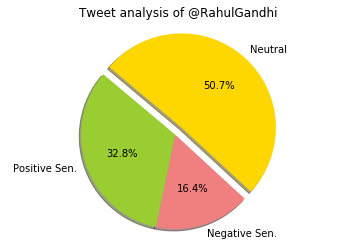

In [43]:
plt.pie(size, explode = explode, colors = colors, labels = label, autopct='%1.1f%%', shadow=True,startangle = 140)
plt.axis("Equal")
plt.title("Tweet analysis of @RahulGandhi")
plt.show()

In [44]:
#import modules for word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [58]:
#this function creates an wordcloud and saves it to local drive
#to create an word cloud pass an string
def create_word_cloud(text):
    #provide image from your drive
    mask = np.array(Image.open("rahulg.PNG")) #mask is the shape in which we want wordcloud to be, 
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = 'white', mask= mask, max_words = 200, stopwords = stopwords)
    wc.generate(text)
    wc.to_file(os.path.join('C:\\Users\\Public','rahul-words.png'))  #os.path.join helps to save the faile at desired location

In [59]:
#calling the above funtion for wordcloud 
create_word_cloud(' '.join(l))